In [176]:
# a highly recommended progress bar for loops.
from tqdm.auto import tqdm, trange
# a recommended module to read and wrangle data
import pandas as pd
# recommended modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Best for array manipulation
import numpy as np

# load necessary libraries
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import rmse
import itertools
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import kendalltau
import dcor



In [177]:
smoke_df = pd.read_csv('intermediary_files/madison_yearly_smoke_estimate_1964_2024.csv')
forecasted_smoke_df = pd.read_csv('intermediary_files/forecasted_smoke_estimates.csv')

In [178]:
health_df = pd.read_csv('intermediary_files/respiratory_illness_mortality_data.csv')

In [179]:
# Merge dataframes on the common column 'Year'
merged_df = pd.merge(health_df, smoke_df, left_on='Year', right_on='Fire_Year', how='inner').drop(columns=['Fire_Year'])

print(merged_df.columns)


Index(['Year', 'Illness_crude_rate_asthma', 'Illness_crude_rate_copd',
       'Cases_tb', 'Death_percent_asthma', 'Death_percent_tb',
       'Death_percent_copd', 'Smoke_Estimate'],
      dtype='object')


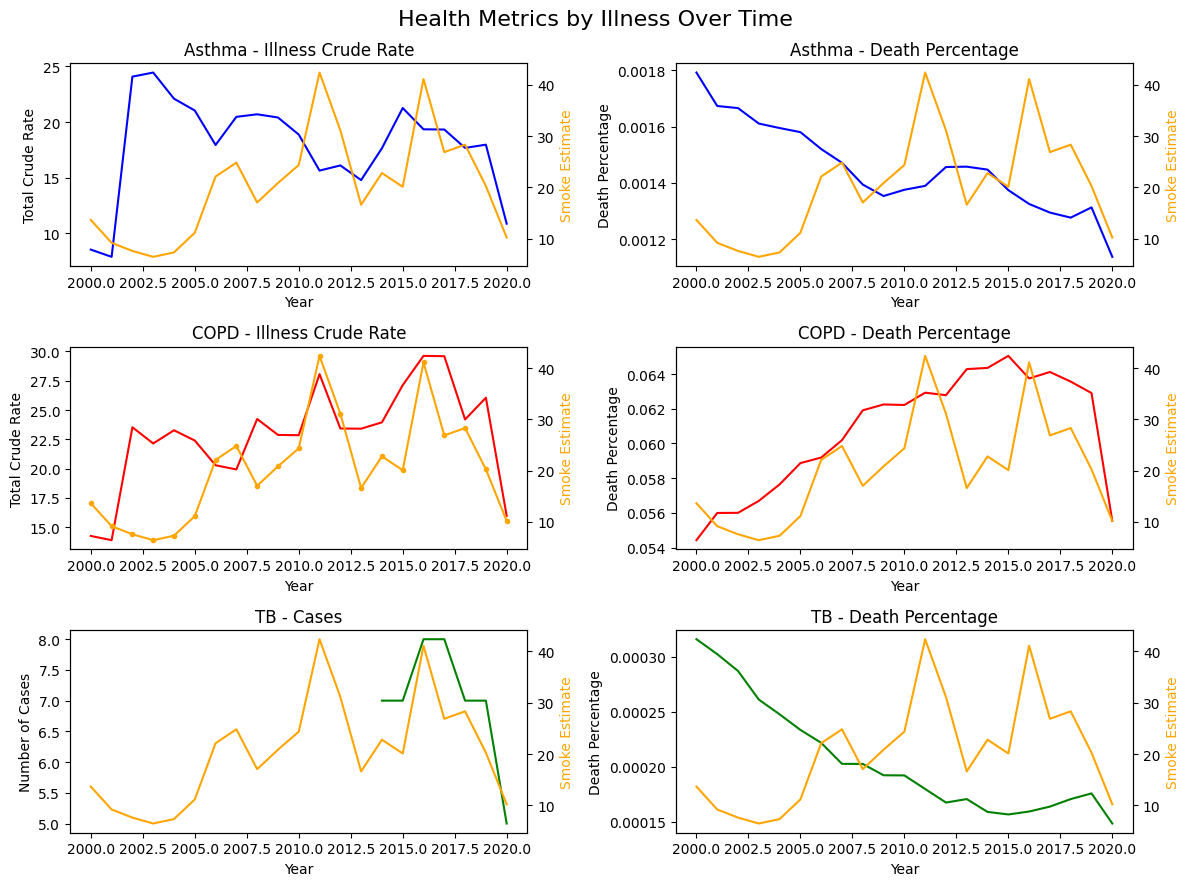

In [180]:

# Filter data for years from 2000 onward
filtered_df = merged_df[(merged_df['Year'] >= 2000) & (merged_df['Year'] <= 2023)]

import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
fig.suptitle('Health Metrics by Illness Over Time', fontsize=16)

# Asthma Plots
axs[0, 0].plot(filtered_df['Year'], filtered_df['Illness_crude_rate_asthma'], color='blue')
axs[0, 0].set_title('Asthma - Illness Crude Rate')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Total Crude Rate')

# Add secondary axis for Smoke_estimate
ax2_0 = axs[0, 0].twinx()
ax2_0.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'], color='orange')
ax2_0.set_ylabel('Smoke Estimate', color='orange')

axs[0, 1].plot(filtered_df['Year'], filtered_df['Death_percent_asthma'],  color='blue')
axs[0, 1].set_title('Asthma - Death Percentage')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Death Percentage')

# Add secondary axis for Smoke_estimate
ax2_1 = axs[0, 1].twinx()
ax2_1.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'],  color='orange')
ax2_1.set_ylabel('Smoke Estimate', color='orange')

# COPD Plots
axs[1, 0].plot(filtered_df['Year'], filtered_df['Illness_crude_rate_copd'],  color='red')
axs[1, 0].set_title('COPD - Illness Crude Rate')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total Crude Rate')

# Add secondary axis for Smoke_estimate
ax2_2 = axs[1, 0].twinx()
ax2_2.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'], marker='.', color='orange')
ax2_2.set_ylabel('Smoke Estimate', color='orange')

axs[1, 1].plot(filtered_df['Year'], filtered_df['Death_percent_copd'],  color='red')
axs[1, 1].set_title('COPD - Death Percentage')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Death Percentage')

# Add secondary axis for Smoke_estimate
ax2_3 = axs[1, 1].twinx()
ax2_3.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'],  color='orange')
ax2_3.set_ylabel('Smoke Estimate', color='orange')

# TB Plots
axs[2, 0].plot(filtered_df['Year'], filtered_df['Cases_tb'], color='green')
axs[2, 0].set_title('TB - Cases')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Number of Cases')

# Add secondary axis for Smoke_estimate
ax2_4 = axs[2, 0].twinx()
ax2_4.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'],  color='orange')
ax2_4.set_ylabel('Smoke Estimate', color='orange')

axs[2, 1].plot(filtered_df['Year'], filtered_df['Death_percent_tb'],  color='green')
axs[2, 1].set_title('TB - Death Percentage')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Death Percentage')

# Add secondary axis for Smoke_estimate
ax2_5 = axs[2, 1].twinx()
ax2_5.plot(filtered_df['Year'], filtered_df['Smoke_Estimate'],  color='orange')
ax2_5.set_ylabel('Smoke Estimate', color='orange')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [181]:
# Analyze correlation between smoke intake and hospitalization rates/incidence
correlation_matrix = merged_df.drop(columns=['Year']).dropna().corr()

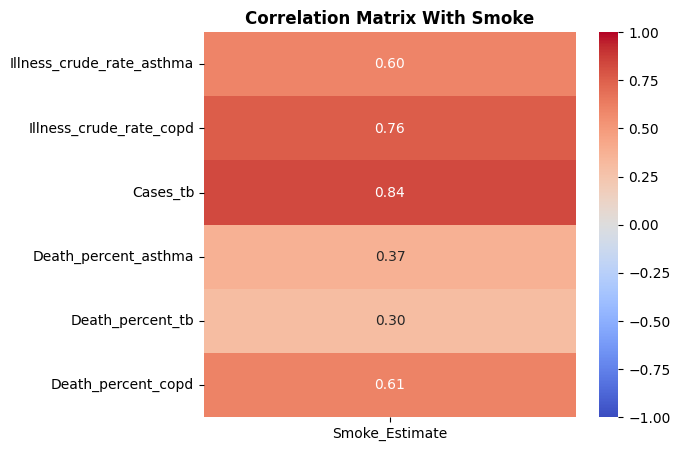

In [182]:
# Plot a heatmap
plt.figure(figsize=(6, 5))
h = sns.heatmap(correlation_matrix[['Smoke_Estimate']].iloc[:-1,:], annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Tilt x-axis labels
_ = h.set_xticklabels(h.get_xticklabels(), rotation=0, ha='center')
plt.title('Correlation Matrix With Smoke', weight= 'bold')
plt.show()

In [77]:
# df = merged_df.drop(columns=['Year']).dropna()

# # Create a dataframe to store p-values
# p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

# # Compute the p-values for each pair of variables
# for i in df.columns:
#     for j in df.columns:
#         if i != j:
#             dist_corr = dcor.distance_correlation(df[i], df[j])
#             p_values.loc[i, j] = dist_corr
#         else:
#             p_values.loc[i, j] = np.nan

# print("P-values Matrix:")
# print(p_values)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(p_values, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)

# # Add labels and title
# plt.title("P-values Heatmap", fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [183]:
smoke_df = pd.concat([smoke_df[['Fire_Year', 'Smoke_Estimate']], forecasted_smoke_df], axis=0)
merged_df = smoke_df.merge(health_df, left_on='Fire_Year', right_on='Year', how='left').drop(columns=['Year']).rename(columns = {'Fire_Year': "Year"})
merged_df = merged_df[merged_df['Year'] >= 2000]
merged_df.head()

,Year,Smoke_Estimate,Illness_crude_rate_asthma,Illness_crude_rate_copd,Cases_tb,Death_percent_asthma,Death_percent_tb,Death_percent_copd
36,2000,13.650358,8.540000,14.260000,NaN,0.001792,0.000316,0.054428
37,2001,9.186901,7.890000,13.900000,NaN,0.001673,0.000302,0.055997
38,2002,7.602821,24.087182,23.530327,NaN,0.001665,0.000287,0.056004
39,2003,6.454358,24.453773,22.147407,NaN,0.001611,0.000261,0.056693
40,2004,7.318638,22.105566,23.271017,NaN,0.001595,0.000248,0.057643


In [184]:
endog_col_dict = {
    "Asthma": [
        'Death_percent_asthma',
        'Illness_crude_rate_asthma'
    ],
    "COPD": [
        'Death_percent_copd',
        'Illness_crude_rate_copd'
    ],
    "TB": [
        'Cases_tb',
        'Death_percent_tb'
    ]
}

exog_cols = [
    'Smoke_Estimate'
]

### Check for resemblance

In [185]:
p_q_dict= {
    "Asthma": (2,2),
    "COPD": (2,2),
    "TB": (1,1),
}

In [194]:
def build_and_evaluate(var_name):
    """
    Calculate and display performance metrics for the time series model.
    
    Args:
        var_name (str): Name of the variable being forecasted
    """
    endog_cols = endog_col_dict[var_name]
    
    # Select training data (2000-2022)
    train_data = merged_df[merged_df['Year'].isin(range(2000, 2022))]
    
    # Standardize the data
    scaler_endog = StandardScaler()
    scaler_exog = StandardScaler()
    
    # Fit the scalers and transform the data
    train_endog_scaled = scaler_endog.fit_transform(train_data[endog_cols])
    train_exog_scaled = scaler_exog.fit_transform(train_data[exog_cols])
    
    # Fit the model
    order = (2, 2)  # Current model order
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            # Fit VARMAX model
            model = VARMAX(train_endog_scaled, exog=train_exog_scaled, order=order)
            results = model.fit(disp=False)
            
            # Get fitted values
            fitted_values = scaler_endog.inverse_transform(results.fittedvalues)
            actual_values = train_data[endog_cols].values
            
            # Calculate metrics
            mae = np.mean(np.abs(fitted_values - actual_values))
            rmse = np.sqrt(np.mean((fitted_values - actual_values)**2))
            mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
            
            # Calculate R-squared
            ss_res = np.sum((actual_values - fitted_values) ** 2)
            ss_tot = np.sum((actual_values - np.mean(actual_values)) ** 2)
            r2 = 1 - (ss_res / ss_tot)
            
            # Get model information criteria
            aic = results.aic
            bic = results.bic
            
            # Create metrics dictionary
            metrics = {
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape,
                'R-squared': r2,
                'AIC': aic,
                'BIC': bic
            }
            
            # Print metrics
            print(f"\nModel Performance Metrics for {var_name}:")
            print("-" * 50)
            print(f"Mean Absolute Error (MAE): {mae:.2f}")
            print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
            print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
            print(f"R-squared: {r2:.3f}")
            print(f"Akaike Information Criterion (AIC): {aic:.2f}")
            print(f"Bayesian Information Criterion (BIC): {bic:.2f}")
            
            # Plot actual vs fitted values
            plt.figure(figsize=(8, 6))
            for i, col in enumerate(endog_cols):
                plt.subplot(len(endog_cols), 1, i+1)
                plt.plot(train_data['Year'], actual_values[:, i], label='Actual')
                plt.plot(train_data['Year'], fitted_values[:, i], 'r--', label='Fitted')
                plt.title(f'{col} - Actual vs Fitted Values')
                plt.xlabel('Year')
                plt.ylabel('Value')
                plt.legend()
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error calculating metrics for {var_name}: {e}")
            return None



Model Performance Metrics for Asthma:
--------------------------------------------------
Mean Absolute Error (MAE): 0.62
Root Mean Square Error (RMSE): 1.32
Mean Absolute Percentage Error (MAPE): 7.23%
R-squared: 0.980
Akaike Information Criterion (AIC): 76.69
Bayesian Information Criterion (BIC): 101.78


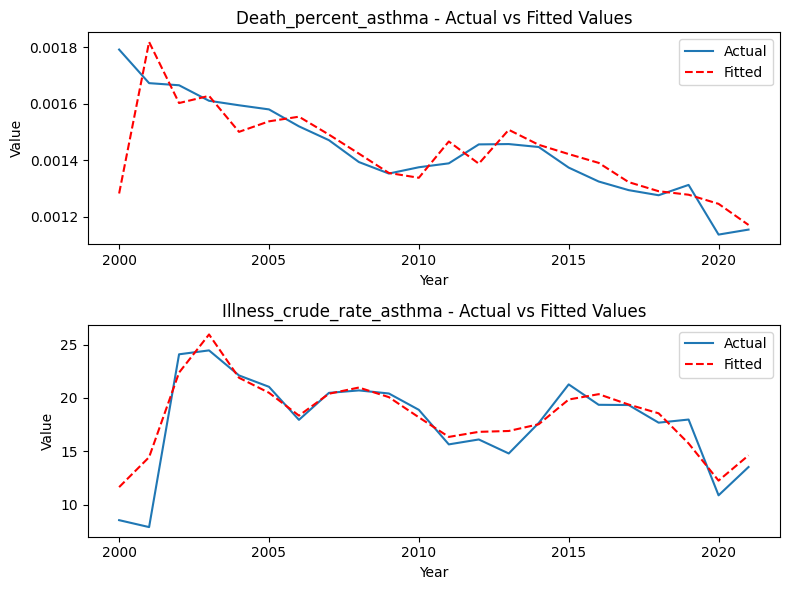

In [195]:
build_and_evaluate('Asthma')


Model Performance Metrics for COPD:
--------------------------------------------------
Mean Absolute Error (MAE): 0.97
Root Mean Square Error (RMSE): 1.76
Mean Absolute Percentage Error (MAPE): 5.64%
R-squared: 0.977
Akaike Information Criterion (AIC): 97.58
Bayesian Information Criterion (BIC): 122.68


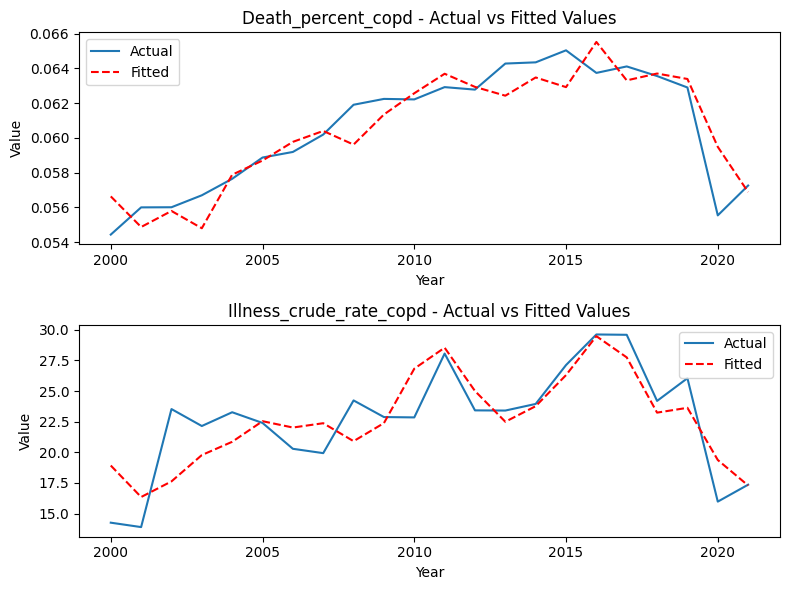

In [196]:
build_and_evaluate('COPD')


Model Performance Metrics for TB:
--------------------------------------------------
Mean Absolute Error (MAE): nan
Root Mean Square Error (RMSE): nan
Mean Absolute Percentage Error (MAPE): nan%
R-squared: nan
Akaike Information Criterion (AIC): 35.53
Bayesian Information Criterion (BIC): 60.62


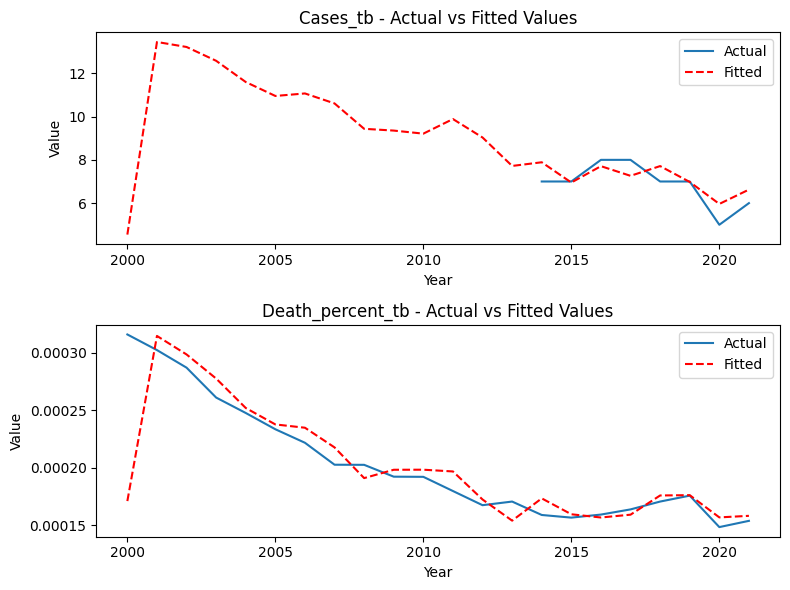

In [197]:
build_and_evaluate('TB')

### Check for resemblance

In [ ]:
def health_forecast(var_name):
    """
    Generate time series forecasts with confidence intervals using VARMAX model.
    
    Args:
        var_name (str): Name of the variable to forecast
        
    Returns:
        pd.DataFrame: Forecast results including mean predictions and confidence intervals
    """
    endog_cols = endog_col_dict[var_name]
    
    # Select data for training (2000–2019) and forecast (2020–2050)
    full_data = merged_df[merged_df['Year'].isin(range(2000, 2022))]
    new_data = merged_df[merged_df['Year'].isin(range(2023, 2051))]
    
    #  Order of the VAR process
    order = (2,2)  
    
    # Standardize the data
    scaler_endog = StandardScaler()
    scaler_exog = StandardScaler()
    
    # Fit the scaler only on columns that are in full_data and new_data
    full_data_endog_scaled = scaler_endog.fit_transform(full_data[endog_cols])
    full_data_exog_scaled = scaler_exog.fit_transform(full_data[exog_cols])
    new_data_exog_scaled = scaler_exog.transform(new_data[exog_cols])

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            # Fit the VARMAX model on the scaled training data
            model = VARMAX(full_data_endog_scaled, exog=full_data_exog_scaled, order=order)    
            results = model.fit(disp=False)

            # Forecast future values on the scaled data with confidence intervals
            forecast_steps = len(new_data)
            forecast = results.get_forecast(steps=forecast_steps, exog=new_data_exog_scaled)

            # Extract forecasted means and confidence intervals
            forecast_mean = forecast.predicted_mean
            forecast_ci = forecast.conf_int(alpha=0.05)  # 95% confidence interval

            # Convert forecast mean to DataFrame
            forecast_df = pd.DataFrame(scaler_endog.inverse_transform(forecast_mean), 
                                     columns=endog_cols, 
                                     index=range(2023, 2023 + forecast_steps))
            
            # Transform confidence intervals back to original scale
            # Split CI array into lower and upper bounds
            ci_lower = scaler_endog.inverse_transform(forecast_ci[:, :len(endog_cols)])
            ci_upper = scaler_endog.inverse_transform(forecast_ci[:, len(endog_cols):])
            
            # Create DataFrames for lower and upper bounds
            ci_lower_df = pd.DataFrame(
                ci_lower,
                columns=[f"{col}_lower" for col in endog_cols],
                index=range(2023, 2023 + forecast_steps)
            )
            ci_upper_df = pd.DataFrame(
                ci_upper,
                columns=[f"{col}_upper" for col in endog_cols],
                index=range(2023, 2023 + forecast_steps)
            )

            # Combine forecasts and confidence intervals
            forecast_df = pd.concat([forecast_df, ci_lower_df, ci_upper_df], axis=1)

            # Ensure no forecasted values or CI bounds are below zero
            forecast_df = forecast_df.clip(lower=0)

        except np.linalg.LinAlgError as e:
            print(f"Covariance issue with VARMAX model for {var_name}: {e}")
            return None
        except Exception as e:
            print(f"Error in forecasting for {var_name}: {e}")
            return None
    
    # Add smoke data
    smoke_data = new_data[['Year', 'Smoke_Estimate']].set_index('Year')
    forecast_df = forecast_df.join(smoke_data)
    
    return forecast_df

In [190]:
asthma_df = health_forecast('Asthma')
asthma_df.head()

,Death_percent_asthma,Illness_crude_rate_asthma,Death_percent_asthma_lower,Illness_crude_rate_asthma_lower,Death_percent_asthma_upper,Illness_crude_rate_asthma_upper,Smoke_Estimate
2023,0.001267,14.850782,0.001134,12.469444,0.001401,17.232121,33.207422
2024,0.001346,12.323866,0.001107,8.635649,0.001585,16.012082,34.447835
2025,0.001435,13.345908,0.001132,9.122265,0.001738,17.569552,35.711001
2026,0.001535,15.386585,0.001177,9.726452,0.001894,21.046718,36.996922
2027,0.001625,17.923733,0.001223,10.395913,0.002026,25.451554,38.305597


In [189]:
copd_df = health_forecast('COPD')
copd_df.head()

,Death_percent_copd,Illness_crude_rate_copd,Death_percent_copd_lower,Illness_crude_rate_copd_lower,Death_percent_copd_upper,Illness_crude_rate_copd_upper,Smoke_Estimate
2023,0.057490,13.819278,0.054716,10.106804,0.060265,17.531751,33.207422
2024,0.059249,19.062377,0.055475,14.363548,0.063023,23.761206,34.447835
2025,0.058658,20.448638,0.054175,12.833591,0.063141,28.063686,35.711001
2026,0.059845,22.164674,0.055094,13.905538,0.064596,30.423811,36.996922
2027,0.061317,23.367689,0.055989,14.763024,0.066645,31.972353,38.305597


In [191]:
tb_df = health_forecast('TB')
tb_df.head()

,Cases_tb,Death_percent_tb,Cases_tb_lower,Death_percent_tb_lower,Cases_tb_upper,Death_percent_tb_upper,Smoke_Estimate
2023,6.039682,0.000132,4.925071,0.000123,7.154292,0.000142,33.207422
2024,6.411629,0.000130,5.183204,0.000113,7.640054,0.000147,34.447835
2025,6.356478,0.000133,4.814767,0.000094,7.898188,0.000172,35.711001
2026,6.489421,0.000137,4.680452,0.000086,8.298391,0.000187,36.996922
2027,6.681983,0.000141,4.384252,0.000080,8.979713,0.000202,38.305597


In [192]:
# Create the future_df by concatenating all disease forecasts
future_df = pd.DataFrame(index=range(2023, 2051))

# Add each disease's forecasts
for df in [asthma_df, copd_df, tb_df]:
    if df is not None:
        for col in df.columns:
            future_df[col] = df[col]

# Add Smoke_Estimate
smoke_data = merged_df[merged_df['Year'].isin(range(2023, 2051))]['Smoke_Estimate'].values
future_df['Smoke_Estimate'] = smoke_data

# Reset index and rename
future_df = future_df.reset_index().rename(columns={'index': 'Year'})
future_df.head()

,Year,Death_percent_asthma,Illness_crude_rate_asthma,Death_percent_asthma_lower,Illness_crude_rate_asthma_lower,Death_percent_asthma_upper,Illness_crude_rate_asthma_upper,Smoke_Estimate,Death_percent_copd,Illness_crude_rate_copd,Death_percent_copd_lower,Illness_crude_rate_copd_lower,Death_percent_copd_upper,Illness_crude_rate_copd_upper,Cases_tb,Death_percent_tb,Cases_tb_lower,Death_percent_tb_lower,Cases_tb_upper,Death_percent_tb_upper
0,2023,0.001267,14.850782,0.001134,12.469444,0.001401,17.232121,33.207422,0.057490,13.819278,0.054716,10.106804,0.060265,17.531751,6.039682,0.000132,4.925071,0.000123,7.154292,0.000142
1,2024,0.001346,12.323866,0.001107,8.635649,0.001585,16.012082,34.447835,0.059249,19.062377,0.055475,14.363548,0.063023,23.761206,6.411629,0.000130,5.183204,0.000113,7.640054,0.000147
2,2025,0.001435,13.345908,0.001132,9.122265,0.001738,17.569552,35.711001,0.058658,20.448638,0.054175,12.833591,0.063141,28.063686,6.356478,0.000133,4.814767,0.000094,7.898188,0.000172
3,2026,0.001535,15.386585,0.001177,9.726452,0.001894,21.046718,36.996922,0.059845,22.164674,0.055094,13.905538,0.064596,30.423811,6.489421,0.000137,4.680452,0.000086,8.298391,0.000187
4,2027,0.001625,17.923733,0.001223,10.395913,0.002026,25.451554,38.305597,0.061317,23.367689,0.055989,14.763024,0.066645,31.972353,6.681983,0.000141,4.384252,0.000080,8.979713,0.000202


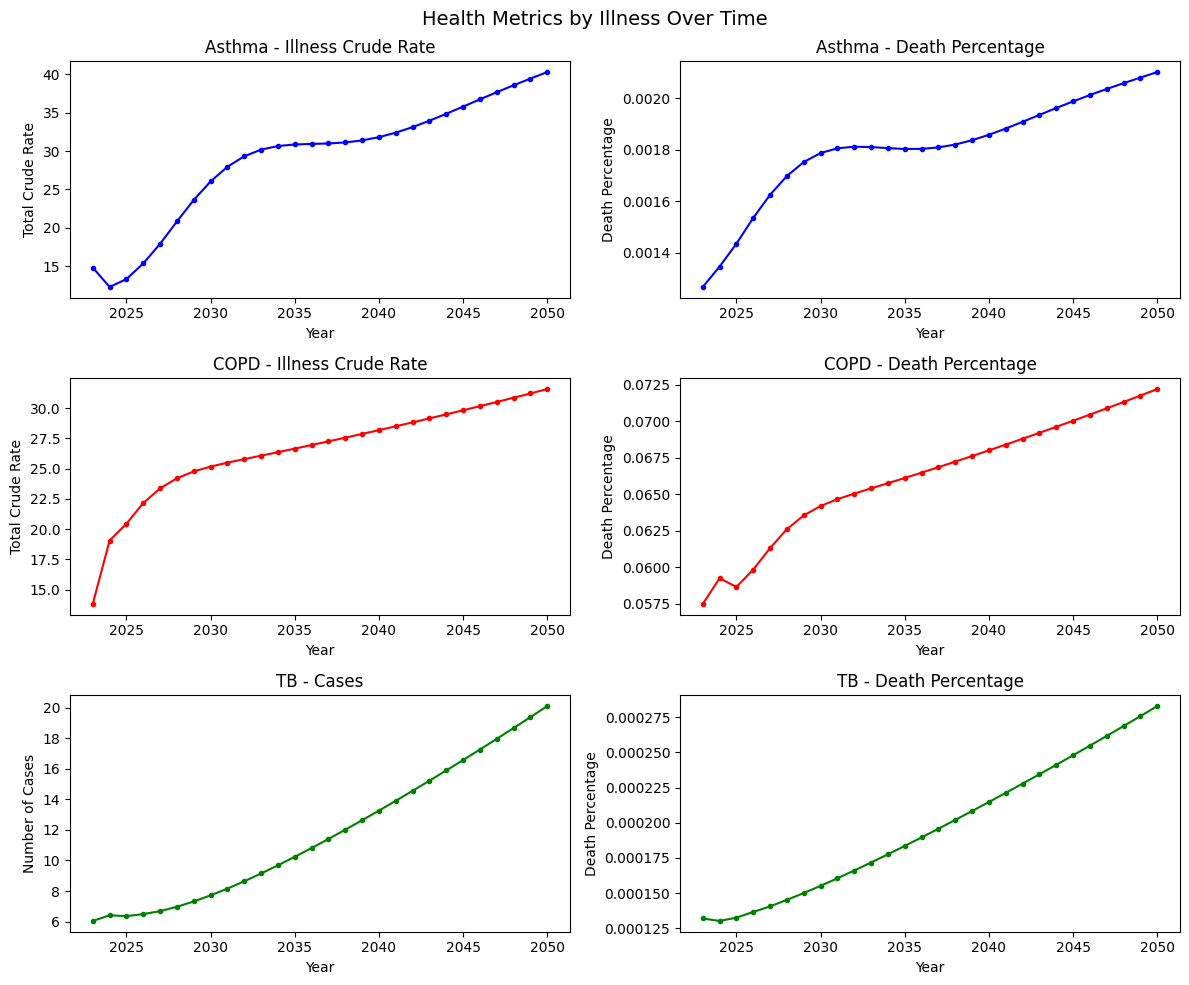

In [193]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Health Metrics by Illness Over Time', fontsize=14)

# Asthma Plots
axs[0, 0].plot(future_df['Year'], future_df['Illness_crude_rate_asthma'], marker='.', color='blue')
axs[0, 0].set_title('Asthma - Illness Crude Rate')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Total Crude Rate')

axs[0, 1].plot(future_df['Year'], future_df['Death_percent_asthma'], marker='.', color='blue')
axs[0, 1].set_title('Asthma - Death Percentage')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Death Percentage')

# COPD Plots
axs[1, 0].plot(future_df['Year'], future_df['Illness_crude_rate_copd'], marker='.', color='red')
axs[1, 0].set_title('COPD - Illness Crude Rate')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total Crude Rate')

axs[1, 1].plot(future_df['Year'], future_df['Death_percent_copd'], marker='.', color='red')
axs[1, 1].set_title('COPD - Death Percentage')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Death Percentage')

# TB Plots
axs[2, 0].plot(future_df['Year'], future_df['Cases_tb'], marker='.', color='green')
axs[2, 0].set_title('TB - Cases')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Number of Cases')

axs[2, 1].plot(future_df['Year'], future_df['Death_percent_tb'], marker='.', color='green')
axs[2, 1].set_title('TB - Death Percentage')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Death Percentage')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [128]:

# # Create a figure with subplots
# fig, axs = plt.subplots(3, 2, figsize=(12, 10))
# fig.suptitle('Health Metrics by Illness Over Time with 95% Confidence Intervals', fontsize=16)

# # Asthma Plots
# axs[0, 0].plot(future_df['Year'], future_df['Total_crude_rate_asthma'], marker='.', color='blue', label='Forecast')
# axs[0, 0].fill_between(future_df['Year'], 
#                        future_df['Total_crude_rate_asthma_lower'],
#                        future_df['Total_crude_rate_asthma_upper'],
#                        alpha=0.1, color='blue', label='95% CI')
# axs[0, 0].set_title('Asthma - Total Crude Rate')
# axs[0, 0].set_xlabel('Year')
# axs[0, 0].set_ylabel('Total Crude Rate')
# axs[0, 0].legend()

# axs[0, 1].plot(future_df['Year'], future_df['Death_percent_asthma'], marker='.', color='blue', label='Forecast')
# axs[0, 1].fill_between(future_df['Year'],
#                        future_df['Death_percent_asthma_lower'],
#                        future_df['Death_percent_asthma_upper'],
#                        alpha=0.1, color='blue', label='95% CI')
# axs[0, 1].set_title('Asthma - Death Percentage')
# axs[0, 1].set_xlabel('Year')
# axs[0, 1].set_ylabel('Death Percentage')
# axs[0, 1].legend()

# # COPD Plots
# axs[1, 0].plot(future_df['Year'], future_df['Total_crude_rate_copd'], marker='.', color='red', label='Forecast')
# axs[1, 0].fill_between(future_df['Year'],
#                        future_df['Total_crude_rate_copd_lower'],
#                        future_df['Total_crude_rate_copd_upper'],
#                        alpha=0.1, color='red', label='95% CI')
# axs[1, 0].set_title('COPD - Total Crude Rate')
# axs[1, 0].set_xlabel('Year')
# axs[1, 0].set_ylabel('Total Crude Rate')
# axs[1, 0].legend()

# axs[1, 1].plot(future_df['Year'], future_df['Death_percent_copd'], marker='.', color='red', label='Forecast')
# axs[1, 1].fill_between(future_df['Year'],
#                        future_df['Death_percent_copd_lower'],
#                        future_df['Death_percent_copd_upper'],
#                        alpha=0.1, color='red', label='95% CI')
# axs[1, 1].set_title('COPD - Death Percentage')
# axs[1, 1].set_xlabel('Year')
# axs[1, 1].set_ylabel('Death Percentage')
# axs[1, 1].legend()

# # TB Plots
# axs[2, 0].plot(future_df['Year'], future_df['Cases_tb'], marker='.', color='green', label='Forecast')
# axs[2, 0].fill_between(future_df['Year'],
#                        future_df['Cases_tb_lower'],
#                        future_df['Cases_tb_upper'],
#                        alpha=0.1, color='green', label='95% CI')
# axs[2, 0].set_title('TB - Cases')
# axs[2, 0].set_xlabel('Year')
# axs[2, 0].set_ylabel('Number of Cases')
# axs[2, 0].legend()

# axs[2, 1].plot(future_df['Year'], future_df['Death_percent_tb'], marker='.', color='green', label='Forecast')
# axs[2, 1].fill_between(future_df['Year'],
#                        future_df['Death_percent_tb_lower'],
#                        future_df['Death_percent_tb_upper'],
#                        alpha=0.1, color='green', label='95% CI')
# axs[2, 1].set_title('TB - Death Percentage')
# axs[2, 1].set_xlabel('Year')
# axs[2, 1].set_ylabel('Death Percentage')
# axs[2, 1].legend()

# # Adjust layout and display
# plt.tight_layout()
# plt.show()